# Car price prediction project by Machine Learning
### César Muro Cabral


### Business understanding

In this project, we predict the car price given a cars dataset with features including make, model, year, engine, and other properties to predict its price. This dataset was obtained from Kaggle.  
  
The characteristics of cars are the *features*, and the price is the *target variable*.  

We perform linear regression, first by normal equation and then using scikit-learn with regularization.

We load the following modules

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data understanding
  
We import the data from my github and store it in a dataframe

In [10]:
url="https://raw.githubusercontent.com/cmuro27/Data_Analysis_Projects_and_Notes/main/datasets/car_sales.csv"
df=pd.read_csv(url)
print(df.head())

  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C

### Data preparation and Modellation

Now, we perform an exploratory data analysis to learn  
* The distribution of the target variable  
* The features in this dataset  
* The distribution of values in these features  
* The quality of data  
* The number of missing values

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

We can already see that there are some inconsistencies in this dataset: the column names sometimes have spaces, and
sometimes have underscores (_). The same is true for feature values: sometimes they’re capitalized, and sometimes they are short strings with spaces. This is inconvenient and confusing, but we can solve this by normalizing them — replacing all spaces with underscores and lowercase all  letters:

In [11]:
df.columns=df.columns.str.lower().str.replace(' ','_')
string_columns=list(df.dtypes[df.dtypes=="object"].index)

for col in string_columns:
    df[col]=df[col].str.lower().str.replace(' ','_')

In [19]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [12]:
df.transmission_type.value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

For us, the most interesting column here is the last one: MSRP (manufacturer’s suggested retail price, or simply the price of a car). We will use this column for predicting the prices of a car.  Then, it’s our target variable, the $y$, which is the value that we want to learn to predict.

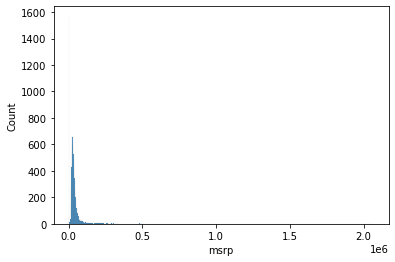

In [13]:
sns.histplot(x="msrp",data=df)
plt.show()

It has a very long tail. The long tail makes it quite difficult for us to see the distribution, but it has an even stronger effect on a model: such distribution can greatly confuse the model, so it won’t learn well enough. Let us cut part of this tail to get a better visualization.

<AxesSubplot:xlabel='msrp', ylabel='Count'>

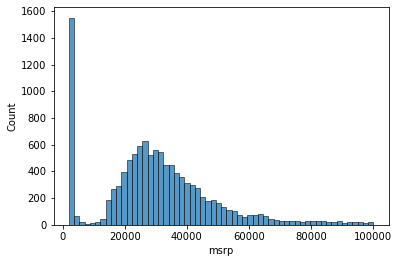

In [22]:
sns.histplot(x="msrp",data=df[df["msrp"]<100000])

In [23]:
df.msrp.describe()

count    1.191400e+04
mean     4.059474e+04
std      6.010910e+04
min      2.000000e+03
25%      2.100000e+04
50%      2.999500e+04
75%      4.223125e+04
max      2.065902e+06
Name: msrp, dtype: float64

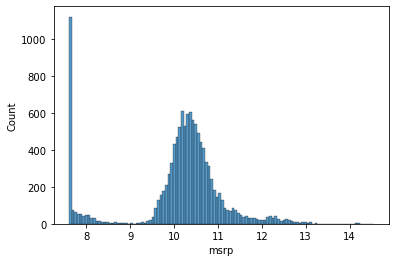

In [14]:
log_price=np.log(df.msrp)
sns.histplot(log_price)
plt.show()

Now, we inspect the missing values of the dataframe

In [15]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

We see that the market_category has a large number of missing values. Afortunately, our target variable, msrp, does not have missing values.

As we learned previously, it’s important to set up the validation framework as early as possible to make sure that the models we train are good and can generalize — that is, that the model can be applied to new, unseen data. To do that, we put aside some data and train the model only on one part. Then we use the held-out dataset — the one we didn’t use for training — to make sure that the predictions of the model make sense.

We split our dataframe such that:  
* $20 %$ of data goes to validation.
* $20 %$ goes to test.
* $60 %$ goes to training.

In [64]:
n=len(df) #Total number of rows
n_val=int(0.2*n) #Number of rows to validation
n_test=int(0.2*n) #Number of rows to test
n_train=n-n_val-n_test #Number of rows to trains

In [65]:
# We shuffle the dataframe
np.random.seed(2)
idx=np.arange(n)
np.random.shuffle(idx)
df_shuffled=df.iloc[idx] #Use an array with indices to get a shuffled dataframe

In [66]:
#Then, we select the subsets
df_train=df_shuffled.iloc[:n_train].copy()
df_val=df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test=df_shuffled.iloc[n_train+n_val:].copy()

Now the DataFrame is split into three parts, and we can continue. Our initial analysis
showed a long tail in the distribution of prices, and to remove its effect, we need to
apply the log transformation. We can do that for each DataFrame separately: 

In [67]:
y_train=np.log1p(df_train.msrp.values)
y_test=np.log1p(df_test.msrp.values)
y_val=np.log1p(df_val.msrp.values)

## First machine learning model - Normal equation
After performing the initial data analysis, we are ready to train a model. The problem we are solving is a regression problem: the goal is to predict a number — the price of a car. For this project we will use the simplest regression model: linear regression.

Our model is $f_{\vec{w},b}(x)=\vec{w}\cdot \vec{x}+w_{0}$, but in matrix form it takes the form
$$g(\vec{x})=X\vec{w},$$
where $\vec{w}=(w_{0},...,w_{n})$ with $w_{0}$ is the bias term of the equation, and $X$ is a matrix with rows with the vectors $\vec{x}^{j}=(1,x^{1},x^{2},...,x^{n})$ with $j=1,2,...,m$ being $m$ the number of vectors. The lenght $n$ of the vector is the number of features.  

In [20]:
def linear_regression(X,w):
    return X.dot(w)

We learn the weights from data: we use the target variable y to find such w that combines the features of X in the best possible way. “Best possible” in the case of linear regression means that it minimizes the error between the predictions g(X) and the actual target y.

In the normal equation approach, the weight vector can be computed with the following formula:
$$w=(X^{T}X)^{-1}X^{T}y,$$
where:  
* $X^{T}$ is the transpose of X. In Numpy X.T
* $X^{T}X$ is matrix multiplication. In Numpy X.T.dot(X)
* $X^{-1}$ is the inverse of $X$. We can use np.linalg.inv function to calculate the inverse.   


To implement the normal equation, we need to do the following:  
1 Create a function that takes in a matrix X with features and a vector y with the target.    
2 Add a dummy column (the feature that is always set to 1) to the matrix X.    
3 Train the model: compute the weights w by using the normal equation.  
4 Split this w into the bias w0 and the rest of the weights, and return them.  

Let us define the machine learning model

In [68]:
def train_linear_regression(X,y):
    #We create and array with ones with the shape of X
    ones=np.ones(X.shape[0])
    #Stacks this as a column to X
    X=np.column_stack([ones,X])
    #The normal equation formula
    w=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    #Splits the weight vector into the bias and the rest of the weight
    return w[0],w[1:]

We will start with a very naive way of creating features: select a few numerical features, and form the matrix X from them. In the previous example, we used only three features. This time, we include a couple more features and use the following columns:  
* engine_hp  
* engine_cylinders  
* highway_mpg  
* city_mpg   
* popularity  
  
We have 5 features.  

Let’s select the features from the data frame and write them to a new variable, df_num. As the linear regression model cannot deal with missing values automatically, we fill the missing values with zeros

In [70]:
base=['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']
df_num=df_train[base]
df_num=df_num.fillna(0)

Now we need to convert this DataFrame to a NumPy array. The easiest way to do it is to use its values property

In [71]:
X_train=df_num.values #It is a matrix

Remember that previous we have defined out y_train array. Applying our model

In [72]:
w_0, w = train_linear_regression(X_train,y_train)

Now we can apply it to the training data to see how well it predicts:

In [73]:
y_pred=w_0+X_train.dot(w)

We can visualize how good our prediciton are by plotting histograms of the predicted and actual prices

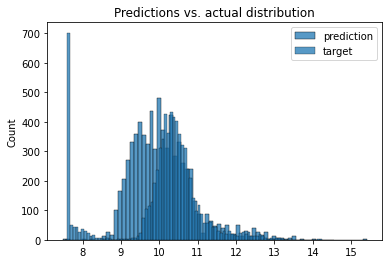

In [74]:
sns.histplot(y_pred,label="prediction")
sns.histplot(y_train,label="target")
plt.title("Predictions vs. actual distribution")
plt.legend()

We can see our model looks different from the actual values. Our model is quite basic and includes only five very simple features.

To evaluate our model we use the metric root mean squared error- RMSE for short.  
$$RMSE=\sqrt{\frac{1}{m}\sum_{i=1}^{m}(g(x_{i})-y_{i})^{2}}$$

When using NumPy to implement RMSE, we can take advantage of vectorization: the process of applying the same operation to all elements of one or more NumPy arrays.

In [30]:
def rmse(y,y_pred):
    mse=((y-y_pred)**2).mean()
    return np.sqrt(mse)

Now we can use RMSE to evaluate the quality of the model:

In [31]:
rmse(y_train,y_pred)

0.7554192603920132

This number tells us that on average, the model’s predictions are off by 0.75. This result alone may not be very useful, but we can use it to compare this model with other models. If one model has a better (lower) RMSE than the other, it indicates that model is better. For that purpose, we set aside a validation dataset.   
We have already split our data into multiple parts: df_train, df_val, and df_test. We have also created a matrix X_train from df_train and used X_train and y_train to train the model. Now we need to do the same steps to get X_val — a matrix with features computed from the validation dataset. Then we can apply the model to X_val to get predictions and compare them with y_val.

In [53]:
#Recall that we have defined the numerical features as base 
base=['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']
df_num=df_val[base]
df_num=df_num.fillna(0)
X_val=df_num.values


In [36]:
#We apply the model to X_val an calculate the rmse  
y_pred=w_0+X_val.dot(w)
rmse(y_val,y_pred)

0.7616530991301594

This value of 0.7616 is the number we should use for comparing models.

In [37]:
#Also recall the training function where we solve by normal equation
def train_linear_regression(X,y):
    #We create and array with ones with the shape of X
    ones=np.ones(X.shape[0])
    #Stacks this as a column to X
    X=np.column_stack([ones,X])
    #The normal equation formula
    w=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    #Splits the weight vector into the bias and the rest of the weight
    return w[0],w[1:]

### Simple feature engineering
To improve oir model further, we can add more features to the model: we create others andd them to the existing features. As we know, this process is called *feature engineering*.  

Because we have already set up the validation framework, we can easily verify wheter addind new features imporves the quality of the model. Our aim is to improve the RMSE calculated on the validation data.  

Since the dataset was created in 2017, we can calculate the age by subtracting the year when the car was made    .


In [38]:
df_train["age"]=df_train.year.max()-df_train.year

In [75]:
#We have also add this feature to the training and validation sets. We define the function
#prepare_X
def prepare_X(df):
    df=df.copy()
    features=base.copy()
    df['age']=2017-df.year
    features.append('age')


    # The numerical values  
    df_num=df[features]
    #Fill with zeroes
    df_num=df_num.fillna(0)
    X= df_num.values
    return X
#Notice the side effect: the caller of the function may not 
#expect the function change the DataFrame.

Let’s test if adding the feature “age” leads to any improvements:

In [76]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train,y_train)
X_val=prepare_X(df_val)
y_pred=w_0+X_val.dot(w)
print('The rmse validation is: ',rmse(y_val,y_pred))

The rmse validation is:  0.5172055461058324


The validation error is 0.517, which is a good improvement from 0.76 — the value we had in the baseline solution. Thus, we conclude that adding “age” is indeed helpful when making predictions.  
  
We can also look at the distribution of predicted values:

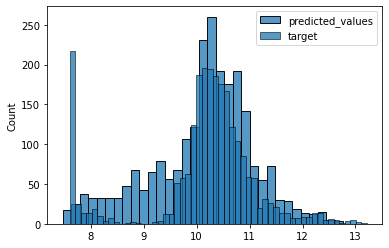

In [42]:
sns.histplot(y_pred, label="predicted_values")
sns.histplot(y_val,label="target")
plt.legend()

### Handling categorical variables
One of the columns we can use next is the number of doors. This variable
appears to be numeric and can take three values: 2, 3, and 4 doors. Even though it’s tempting to put the variable to the model as is, it’s not really a numeric variable: we cannot say that by adding one more door, the price of a car grows (or drops) by a certain amount of money. Rather, the variable is categorical.

*Categorical variables* describe characteristics of objects and can take one of a few possible values. The make of a car is a categorical variable; for example, it can be Toyota, BWM, Ford, or any other make. It’s easy to recognize a categorical variable by its values, which typically are strings and not numbers. That’s not always the case, however. The number of doors, for example, is categorical.

We can use categorical variables in a machine learning model in multiple ways.
One of the simplest ways is to encode such variables by a set of binary features, with a separate feature for each distinct value. This method is called *one-hot encoding*.

Then, at the example of the number of doors, we create three binary features: num_doors_2, num_doors_3, num_doors_4. If the car has two doors, num_doors_2 will be set to 1, and the rest will be 0. 

In [54]:
df.number_of_doors.value_counts()

4.0    8353
2.0    3160
3.0     395
Name: number_of_doors, dtype: int64

In [51]:
df.vehicle_size.value_counts()

compact    4764
midsize    4373
large      2777
Name: vehicle_size, dtype: int64

In [49]:
df.transmission_type.value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

We encode three features: number_of_doors ,vehicle_size, transmission_type. 

In [85]:
#We follow the same process of defining a function to generate our
# train, test, and validate sets using our selected features
def prepare_X(df):
    df=df.copy()
    features=base.copy()
    df['age']=2017-df.year
    features.append('age')

    for v in [2,3,4]:
       feature = 'num_doors_%s' % v
       df[feature]=(df['number_of_doors']==v).astype(int)
       features.append(feature)

    for v in ['compact','midsize','large']:
       feature='is_size_%s' % v
       df[feature]=(df['vehicle_size']==v).astype(int)
       features.append(feature)

    for v in ['automatic','manual','automated_manual','direct_drive']:
        feature='is_transmission_%s' % v 
        df[feature]=(df['transmission_type']==v).astype(int)
        features.append(feature)

    df_num=df[features]
    df_num=df_num.fillna(0)
    X= df_num.values
    return X

    


Let's see the result of adding this features

In [86]:
X_train=prepare_X(df_train)
w_0, w = train_linear_regression(X_train,y_train)
X_val=prepare_X(df_val)
y_pred= w_0 +X_val.dot(w)
print('validation: ',rmse(y_val,y_pred))

validation:  82.51382247348684


The number we got is significantly worse than before. The reason of this behavior is numerical instability. Recall the formula of normal equation
$$w=(X^{T}X)^{-1}X^{T}y.$$
It contains the inverse matrix $(X^{T}X)^{-1}$. This inversion is an issue in our case. Sometimes when adding a new colum to $X$, we can accidentally add a column that is a combination of other columns. When this happens, $(X^{T}X)^{-1}$ becomes undetermine or singular which means that it has not inverse. Our code did not raise any exception because we don't typically have columns that are perfect linear combinations of other columns. 

Notice that, if we keep only the feature transmission_type, we get again a low rmse

In [83]:
#We follow the same process of defining a function to generate our
# train, test, and validate sets using our selected features
def prepare_X(df):
    df=df.copy()
    features=base.copy()
    df['age']=2017-df.year
    features.append('age')

#    for v in [2,3,4]:
#       feature = 'num_doors_%s' % v
#       df[feature]=(df['number_of_doors']==v).astype(int)
#        features.append(feature)

#    for v in ['compact','midsize','large']:
#       feature='is_size_%s' % v
#       df[feature]=(df['vehicle_size']==v).astype(int)
#       features.append(feature)

    for v in ['automatic','manual','automated_manual','direct_drive']:
        feature='is_transmission_%s' % v 
        df[feature]=(df['transmission_type']==v).astype(int)
        features.append(feature)

    df_num=df[features]
    df_num=df_num.fillna(0)
    X= df_num.values
    return X


In [84]:
X_train=prepare_X(df_train)
w_0, w = train_linear_regression(X_train,y_train)
X_val=prepare_X(df_val)
y_pred= w_0 +X_val.dot(w)
print('validation: ',rmse(y_val,y_pred))

validation:  0.5087375348896964
